In this example, we will introduce more options for `TransBigData` grid processing, including:
- Adding rotation angle.
- Triangle and hexagon grids.

# Rotate the grids

In [4]:
#Read taxi gps data
import transbigdata as tbd
import pandas as pd
data = pd.read_csv('../example/data/TaxiData-Sample.csv',header = None) 
data.columns = ['VehicleNum','time','lon','lat','OpenStatus','Speed'] 
#Define the study area
bounds = [113.75, 22.4, 114.62, 22.86]
#Delete the data out of the study area
data = tbd.clean_outofbounds(data,bounds = bounds,col = ['lon','lat'])

The grid coordinates system offer by `TransBigData` also adding rotation angle for the grids.  
you can also specify a rotation angle for the grids by adding the `theta` into gridding params:

In [5]:
#Obtain the gridding parameters
params = tbd.grid_params(bounds,accuracy = 1000)
#Add a rotation angle
theta = 25
params = [*params[:4],theta]
params

[113.75, 22.4, 0.00974336289289822, 0.008993210412845813, 25]

<AxesSubplot:>

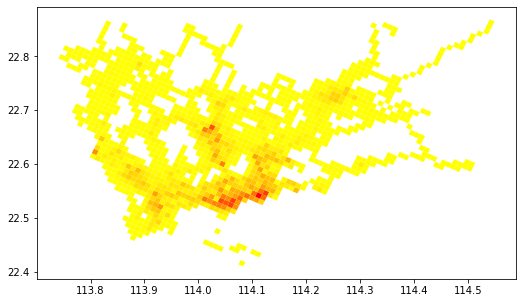

In [11]:
#Map the GPS data to grids
data['LONCOL'],data['LATCOL'] = tbd.GPS_to_grids(data['lon'],data['lat'],params)
#Aggregate data into grids
grid_agg = data.groupby(['LONCOL','LATCOL'])['VehicleNum'].count().reset_index()
#Generate grid geometry
grid_agg['geometry'] = tbd.gridid_to_polygon(grid_agg['LONCOL'],grid_agg['LATCOL'],params)
#Change the type into GeoDataFrame
import geopandas as gpd
grid_agg = gpd.GeoDataFrame(grid_agg)
#Plot the grids
grid_agg.plot(column = 'VehicleNum',cmap = 'autumn_r',figsize=(10,5))

# Triangle and Hexagon grids

In [7]:
#Map the GPS data to grids
data['gridid'] = tbd.GPS_to_grids_tri(data['lon'],data['lat'],params)
#Aggregate data into grids
grid_agg = data.groupby(['gridid'])['VehicleNum'].count().reset_index()
#Generate grid geometry
grid_agg['geometry'] = tbd.gridid_to_polygon_tri(grid_agg['gridid'],params)
#Change the type into GeoDataFrame
import geopandas as gpd
grid_agg = gpd.GeoDataFrame(grid_agg)
#Plot the grids
grid_agg.plot(column = 'VehicleNum',cmap = 'autumn_r',figsize=(10,5))

KeyError: 'gridid'

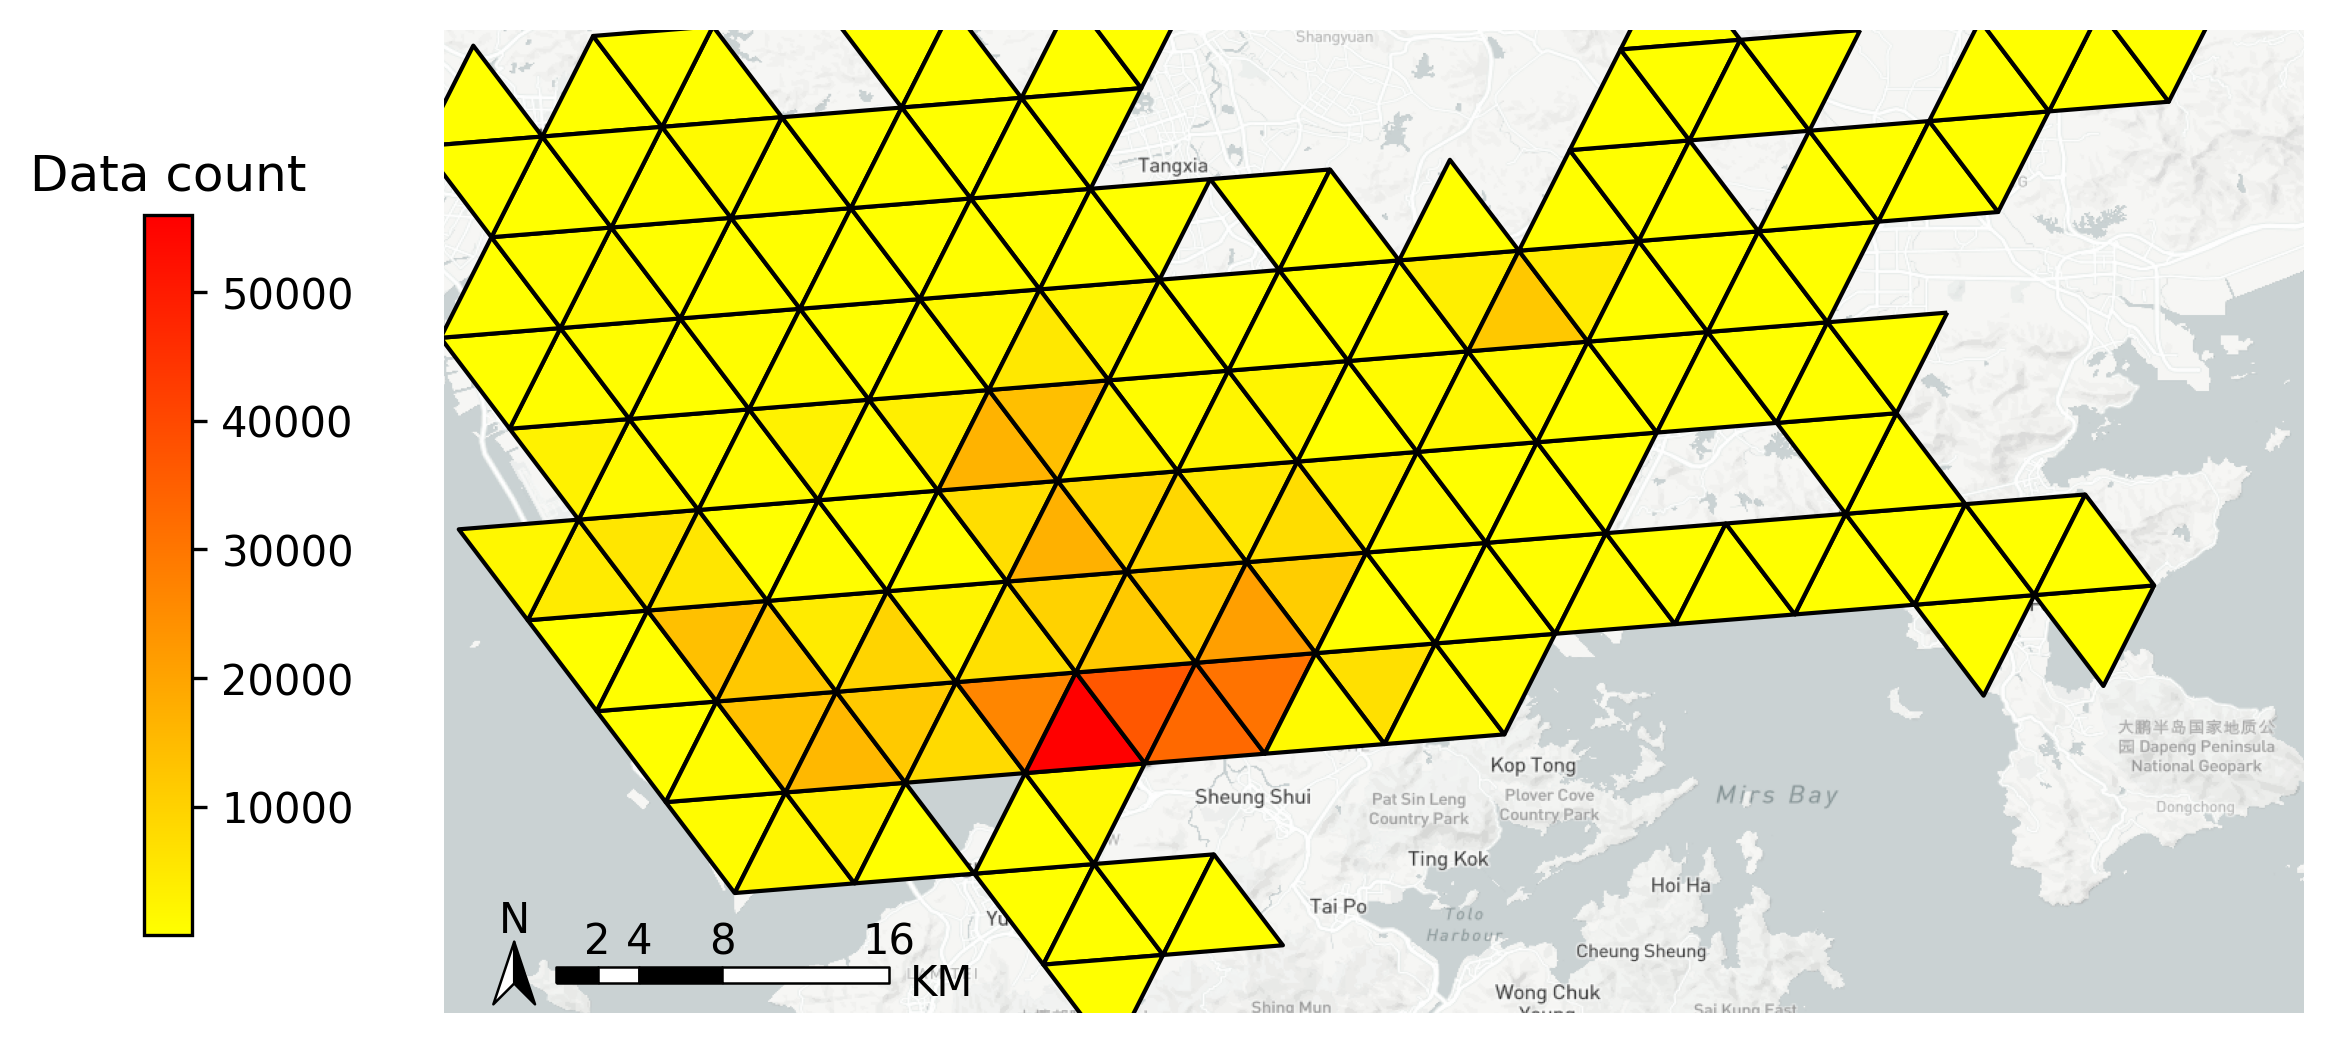

In [59]:
#Map the GPS data to grids
data['gridid'] = tbd.GPS_to_grids_hexa(data['lon'],data['lat'],params)
#Aggregate data into grids
grid_agg = data.groupby(['gridid'])['VehicleNum'].count().reset_index()
#Generate grid geometry
grid_agg['geometry'] = tbd.gridid_to_polygon_hexa(grid_agg['gridid'],params)
#Change the type into GeoDataFrame
import geopandas as gpd
grid_agg = gpd.GeoDataFrame(grid_agg)
#Plot the grids
grid_agg.plot(column = 'VehicleNum',cmap = 'autumn_r',figsize=(10,5))